In [22]:
from __future__ import print_function
from keras import utils
import keras 
import tensorflow as tf
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.models import load_model
import os
from keras.utils import np_utils
from tensorflow.keras import optimizers


batch_size = 32
num_classes = 10
epochs = 20


(x_train, y_train),(x_test, y_test) = cifar10.load_data()

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255


y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)

model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))


opt = tf.keras.optimizers.RMSprop(learning_rate=0.1)


model.compile(loss = 'categorical_crossentropy',
              optimizer = opt,
              metrics = ['accuracy'])

print(model.summary())

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 activation_48 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 conv2d_33 (Conv2D)          (None, 30, 30, 32)        9248      
                                                                 
 activation_49 (Activation)  (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 dropout_24 (Dropout)        (None, 15, 15, 32)

In [23]:
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test),
          shuffle=True)

model.save("/home/deeplearningcv/DeeplearningCV/Trained Models/cifar_simple_cnn_2.h5")


scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Epoch 1/20
1563/1563 [==============================] - 11s 6ms/step - loss: 110730.9531 - accuracy: 0.0982 - val_loss: 2.3080 - val_accuracy: 0.1000
Epoch 2/20
1563/1563 [==============================] - 9s 6ms/step - loss: 2.6834 - accuracy: 0.0985 - val_loss: 2.3100 - val_accuracy: 0.1000
Epoch 3/20
1563/1563 [==============================] - 9s 6ms/step - loss: 2.3156 - accuracy: 0.1007 - val_loss: 2.3187 - val_accuracy: 0.1000
Epoch 4/20
1563/1563 [==============================] - 9s 6ms/step - loss: 30.3271 - accuracy: 0.0988 - val_loss: 2.3230 - val_accuracy: 0.1000
Epoch 5/20
1563/1563 [==============================] - 9s 6ms/step - loss: 2.3191 - accuracy: 0.0990 - val_loss: 2.3113 - val_accuracy: 0.1000
Epoch 6/20
1563/1563 [==============================] - 9s 6ms/step - loss: 2.3160 - accuracy: 0.0995 - val_loss: 2.3200 - val_accuracy: 0.1000
Epoch 7/20
1563/1563 [==============================] - 9s 6ms/step - loss: 2.3162 - accuracy: 0.0971 - val_loss: 2.3299 - val_ac

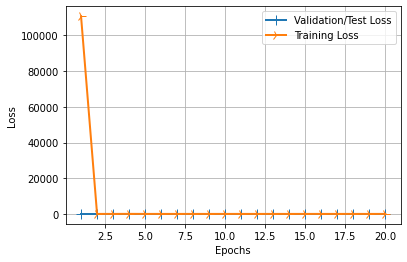

In [24]:
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()